In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dc_stat_think as dcst

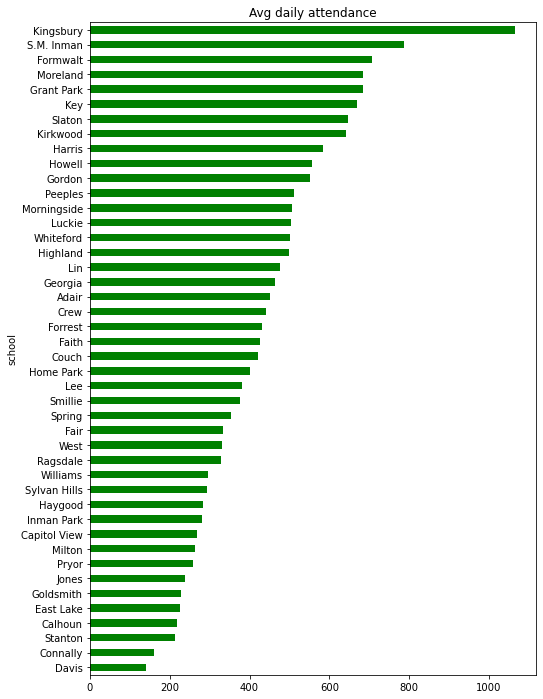

In [6]:
#http://users.stat.ufl.edu/~winner/data/atlschool.dat
data=[
('Adair',           66.90,   451.4,  160.22,   90.77,    33.8),
('Calhoun',        108.57,   219.1,  161.79,   89.86,    23.0),
('Capitol View',    70.00,   268.9,  136.37,   92.44,    29.4),
('Connally',        49.04,   161.7,  106.86,   92.01,    29.4),
('Couch',           71.51,   422.1,  147.17,   91.60,    29.2),
('Crew',            61.08,   440.6,  146.24,   89.32,    36.3),
('Davis',          105.21,   139.4,  159.79,   86.51,    22.6),
('East Lake',       61.91,   225.3,  106.74,   91.07,    36.7),
('Fair',            75.14,   333.9,  130.24,   88.39,    27.6),
('Faith',           75.35,   427.3,  152.39,   91.12,    30.0),
('Formwalt',        59.45,   706.1,  139.11,   89.46,    32.5),
('Forrest',         59.03,   431.2,  154.99,   89.72,    36.0),
('Georgia',         64.96,   464.2,  138.32,   90.53,    29.2),
('Goldsmith',       71.76,   227.7,  141.34,   92.81,    30.8),
('Gordon',          66.96,   551.4,  153.19,   91.98,    31.9),
('Grant Park',      73.26,     684,  135.70,   86.47,    28.6),
('Harris',          65.65,   585.1,  148.77,   93.15,    29.2),
('Haygood',         72.11,   284.3,  157.38,   89.01,    27.0),
('Highland',        64.58,   498.3,  148.60,   91.11,    30.8),
('Home Park',       65.97,     402,  156.93,   91.01,    30.2),
('Howell',          61.74,   556.6,  154.95,   90.88,    33.5),
('Inman Park',      87.07,   281.5,  147.59,   87.51,    26.9),
('S.M. Inman',      58.27,   786.1,  139.91,   91.23,    32.0),
('Jones',           81.47,   238.3,  132.17,   90.38,    27.9),
('Key',             58.80,   668.9,  140.39,   90.47,    33.4),
('Kingsbury',       62.47,  1065.4,  140.24,   92.00,    30.2),
('Kirkwood',        66.44,   641.1,  159.19,   91.03,    30.7),
('Lee',             73.64,   381.1,  136.21,   89.30,    30.0),
('Lin',             56.07,   476.3,  151.84,   92.05,    35.0),
('Luckie',          60.48,   503.4,  144.83,   88.19,    34.6),
('Milton',          90.21,   262.5,  165.13,   93.48,    31.3),
('Moreland',        54.10,   685.3,  149.61,   92.96,    35.2),
('Morningside',     58.25,   507.2,  117.99,   90.47,    30.7),
('Peeples',         58.45,     511,  151.36,   92.51,    35.2),
('Pryor',           60.90,   257.2,  146.75,   89.87,    30.4),
('Ragsdale',        80.12,   329.6,  124.82,   94.72,    25.8),
('Slaton',          58.35,   646.5,  160.13,   90.70,    30.7),
('Smillie',         61.77,   376.9,  146.85,   92.26,    31.2),
('Spring',          67.60,   354.7,  151.61,   91.23,    33.1),
('Stanton',         73.27,     212,  166.10,   93.22,    30.2),
('Sylvan Hills',    59.27,   294.1,  116.53,   92.43,    33.6),
('West',            75.43,   331.1,  146.60,   90.78,    28.2),
('Whiteford',       64.54,   501.6,  148.49,   90.38,    30.8),
('Williams',        49.76,   295.8,  125.92,   89.11,    32.1)]

columns=['school','per-pupil-cost','avg-daily-attendance','monthly-teach-salary','percent-attendance','pupil-teacher-ratio']
df=pd.DataFrame(data,columns=columns)
df['pupil-teacher-ratio']=df['pupil-teacher-ratio'].astype(float)
df['class_size']=df['pupil-teacher-ratio'].apply(lambda row: 'small' if (row>0.0 and row<25.0) else 'medium' if(row>=25.0 and row<30.0) else 'large')
fig,ax=plt.subplots(figsize=(8,12))
grouped=df.groupby('school')['avg-daily-attendance'].mean()
grouped.sort_values(ascending=True).plot(kind='barh',ax=ax,color='green')
plt.title('Avg daily attendance')
plt.show()

In [15]:
size_dist=df['class_size'].value_counts()
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'group_count']
size_dist['prob']=size_dist['group_count'].apply(lambda row: row/df.shape[0])
for key,item in size_dist.iterrows():
    #print(item.group_size)
    size_dist.loc[key,'group_avg']=df[df['class_size']==item.group_size]['pupil-teacher-ratio'].mean()
print(size_dist)
expected_value =np.sum(size_dist['group_count']*size_dist['prob'])
print("expected value",expected_value)

print("what is the probability of a class being smaller than 30")
results = size_dist[size_dist['group_avg']<30]
prob_30_or_less=np.sum(results['prob'])
print("probability of 30 or less students",prob_30_or_less)

  group_size  group_count      prob  group_avg
0      large           30  0.681818      32.43
1     medium           12  0.272727      28.20
2      small            2  0.045455      22.80
expected value 23.818181818181817
what is the probability of a class being smaller than 30
probability of 30 or less students 0.3181818181818182
